<a href="https://colab.research.google.com/github/JERSONMALDONA/senales-y-sistemas/blob/main/Parcial_de_se%C3%B1ales_y_sistemas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Se tiene un microprocesador de 5 bits con entrada análoga de -3.3 a 5 [V]. Diseñe el sistema de acondicionamiento y digitalización para la señal: $x(t) = 20 \sin\left(7t - \frac{\pi}{2}\right) - 3 \cos(5t) + 2 \cos(10t)$. Presente las simulaciones y gráficas de los procedimientos más representativos en un cuaderno de Python, incluyendo al menos dos períodos de la señal estudiada.


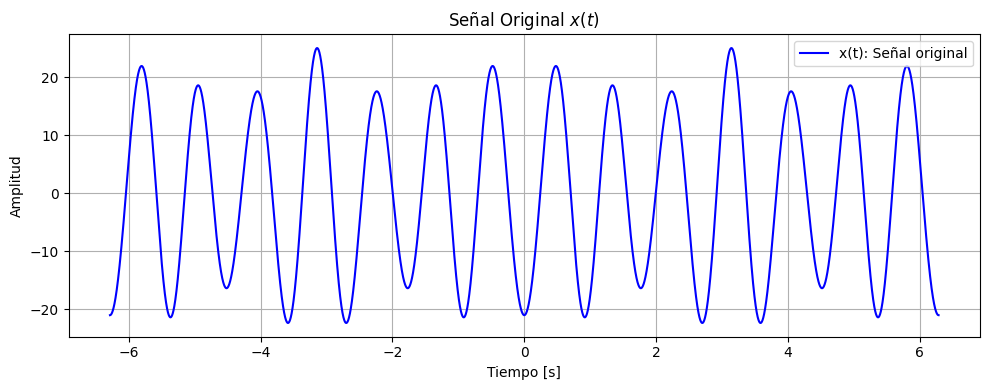

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de muestreo
frecuencia_muestreo = 10000            # Frecuencia de muestreo en Hz
periodo_muestreo = 1 / frecuencia_muestreo  # Periodo entre muestras
periodo_fundamental = 2 * np.pi       # Periodo base de la señal
tiempo = np.arange(-periodo_fundamental, periodo_fundamental, periodo_muestreo)  # Rango temporal

# Definición de la señal
senal = 20 * np.sin(7 * tiempo - np.pi/2) - 3 * np.cos(5 * tiempo) + 2 * np.cos(10 * tiempo)

# Graficar la señal
plt.figure(figsize=(10, 4))
plt.plot(tiempo, senal, label='x(t): Señal original', color='blue')
plt.title('Señal Original $x(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


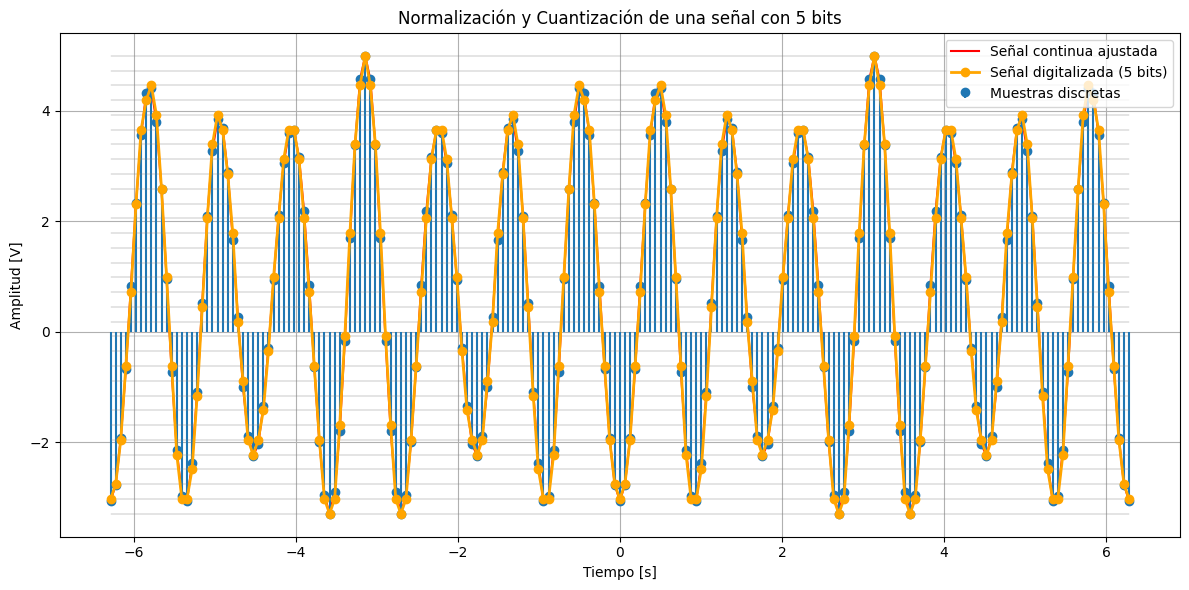

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Paso 1: Crear la señal original s(t)
f_max = 10 / (2 * np.pi)          # Frecuencia máxima (de cos(10t)) en Hz
fs_muestreo = 10 * f_max          # Frecuencia de muestreo (cumple Nyquist)
ts_muestreo = 1 / fs_muestreo     # Periodo de muestreo
periodo_base = 2 * np.pi          # Periodo fundamental
t_vals = np.arange(-periodo_base, periodo_base, ts_muestreo)  # Rango de simulación

# Definición de la señal s(t)
senal_original = 20 * np.sin(7 * t_vals - np.pi/2) - 3 * np.cos(5 * t_vals) + 2 * np.cos(10 * t_vals)

# Paso 2: Escalamiento (Ajuste de amplitud)
amplitud_min = np.min(senal_original)
amplitud_max = np.max(senal_original)
adc_min = -3.3
adc_max = 5.0

# Aplicar la transformación lineal
senal_escalada = ((senal_original - amplitud_min) / (amplitud_max - amplitud_min)) * (adc_max - adc_min) + adc_min

# Paso 3: Cuantización de 5 bits
bits_adc = 5
num_niveles = 2**bits_adc
niveles_adc = np.linspace(adc_min, adc_max, num_niveles)

# Comparación por distancia para encontrar niveles más cercanos
distancias = cdist(senal_escalada.reshape(-1, 1), niveles_adc.reshape(-1, 1))
indices_minimos = np.argmin(distancias, axis=1)
senal_cuantizada = niveles_adc[indices_minimos]

# Paso 4: Visualización
plt.figure(figsize=(12, 6))

# Gráfica de la señal continua acondicionada
plt.plot(t_vals, senal_escalada, color='red', label='Señal continua ajustada')

# Gráfica en forma discreta
plt.stem(t_vals, senal_escalada, label='Muestras discretas', basefmt=" ")

# Dibujar los niveles de cuantización como líneas horizontales
for nivel in niveles_adc:
    plt.plot(t_vals, nivel * np.ones_like(t_vals), color='gray', linewidth=0.3)

# Señal final digitalizada
plt.plot(t_vals, senal_cuantizada, color='orange', marker='o', linewidth=2, label='Señal digitalizada (5 bits)')

# Configuración del gráfico
plt.title('Normalización y Cuantización de una señal con 5 bits')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


2. ¿Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo-digital con frecuencia de muestreo de 5kHz, aplicado a la señal $x(t) = 3 \cos(1000\pi t) + 5 \sin(2000\pi t) + 10 \cos(11000\pi t)$ Realizar la simulación del proceso de discretización. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.



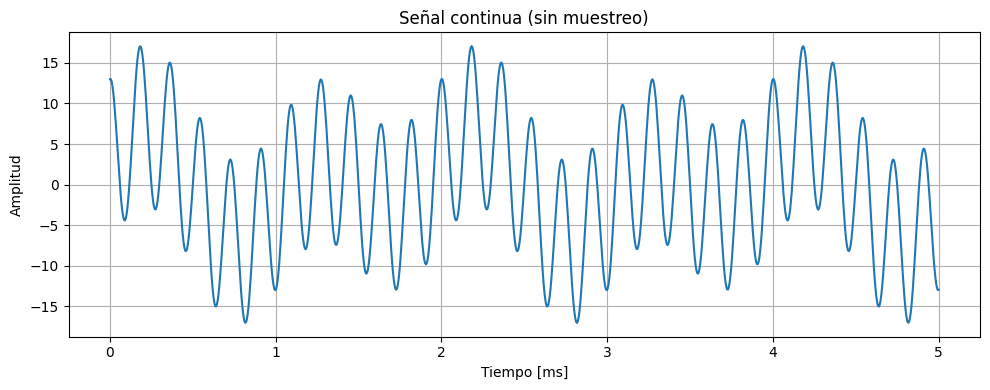

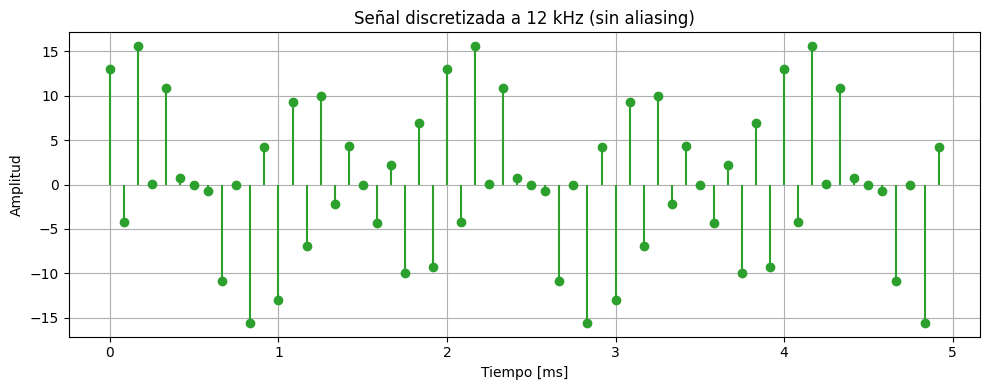

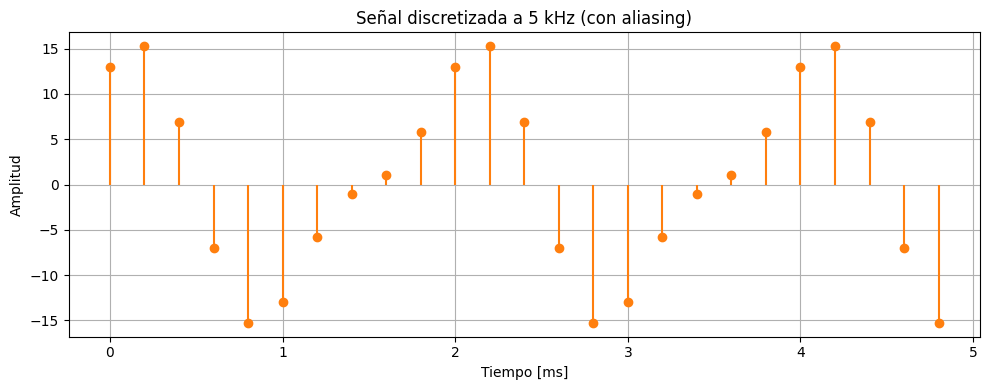

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
amp_a, amp_b, amp_c = 3, 5, 10
omega_a = 1000 * np.pi   # 500 Hz
omega_b = 2000 * np.pi   # 1000 Hz
omega_c = 11000 * np.pi  # 5500 Hz

# Señal continua
tiempo_cont = np.linspace(0, 0.005, 1000)
senal_cont = amp_a * np.cos(omega_a * tiempo_cont) + amp_b * np.sin(omega_b * tiempo_cont) + amp_c * np.cos(omega_c * tiempo_cont)

# Señal discretizada fs = 5 kHz
frecuencia_5k = 5000
tiempo_5k = np.arange(0, 0.005, 1/frecuencia_5k)
senal_5k = amp_a * np.cos(omega_a * tiempo_5k) + amp_b * np.sin(omega_b * tiempo_5k) + amp_c * np.cos(omega_c * tiempo_5k)

# Señal discretizada fs = 12 kHz
frecuencia_12k = 12000
tiempo_12k = np.arange(0, 0.005, 1/frecuencia_12k)
senal_12k = amp_a * np.cos(omega_a * tiempo_12k) + amp_b * np.sin(omega_b * tiempo_12k) + amp_c * np.cos(omega_c * tiempo_12k)

# Gráfica 1: Señal continua
plt.figure(figsize=(10, 4))
plt.plot(tiempo_cont * 1000, senal_cont, label='Señal continua', linewidth=1.5)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Señal continua (sin muestreo)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica 2: Muestreo a 12 kHz
plt.figure(figsize=(10, 4))
plt.stem(tiempo_12k * 1000, senal_12k, linefmt='C2-', markerfmt='C2o', basefmt=" ")
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Señal discretizada a 12 kHz (sin aliasing)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica 3: Muestreo a 5 kHz
plt.figure(figsize=(10, 4))
plt.stem(tiempo_5k * 1000, senal_5k, linefmt='C1-', markerfmt='C1o', basefmt=" ")
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Señal discretizada a 5 kHz (con aliasing)')
plt.grid(True)
plt.tight_layout()
plt.show()


3. La distancia media entre dos señales $x1(t),x2(t) ∈ R,C,$ se puede expresar a partir de la potencia media:
$$
d(x_{1},x_{2})=\bar{P}_{x_{1}-x_{2}}=\displaystyle \lim_{T \to \infty }\frac{1}{T}\int_{T}^{}\left | x_{1}(t)-x_{2}(t)\right |^{2}dt
$$
Sean $x_{1}(t)$ y $x_{2}(t)$:
$$
x_{1}(t)=A\,cos(\omega _{0}t),\quad\omega _{0}=\frac{2\pi }{T},\quad T,A \in\mathbb{R}^{+}
$$

$$
x_{2}(t)=\begin{cases}
   1         & \text{si }\quad 0\leq t < \frac{T}{4} \\
  -1         & \text{si }\quad  \frac{T}{4}\leq t < \frac{3T}{4} \\
   1   & \text{si }\quad \frac{3T}{4}\leq t < T
\end{cases}
$$

¿Cuál es la distancia media entre las señales?. Corrobore sus
 desarrollos con Sympy.

Analizando las dos señales, nos damos cuenta que tenemos una señal a trozos ($x_{2}(t)$), por lo tanto, dividimos los intervalos, donde optenemos 3 integrales:
$$
\bar{P}_{x_{1}-x_{2}}=\displaystyle \lim_{T \to \infty }\frac{1}{T}\left [ \int_{0}^{T/4} \left ( A\,cos(w_{0}t)-1 \right )^{2}dt\;+\;\int_{T/4}^{3T/4} \left ( A\,cos(w_{0}t)+1 \right )^{2}dt\;+\;\int_{3T/4}^{T} \left ( A\,cos(w_{0}t)-1 \right )^{2}dt\right ]
$$

Asi que procedemos a hallar las integrales.

Resolviendo la primera integral en el intervalo de $0\leq t < T/4$
$$
\int_{0}^{T/4} \left ( A\,cos(w_{0}t)-1 \right )^{2}dt
$$

In [6]:
import sympy as sp

# Variables simbólicas (manteniendo T y A como solicitaste)
t, T, A = sp.symbols('t T A')
omega = (2 * sp.pi) / T

# Primera función e integral
expr_1 = (A * sp.cos(omega * t) - 1)**2
limite_1a, limite_1b = 0, T / 4
res_1 = sp.integrate(expr_1, (t, limite_1a, limite_1b))

print("La integral definida de", expr_1, "desde", limite_1a, "hasta", limite_1b, "es:")
res_1


La integral definida de (A*cos(2*pi*t/T) - 1)**2 desde 0 hasta T/4 es:


A**2*T/8 - A*T/pi + T/4

Resolviendo la segunda integral en el intervalo de $T/4\leq t < 3T/4$
$$
\int_{T/4}^{3T/4} \left ( A\,cos(w_{0}t)+1 \right )^{2}dt
$$

In [7]:
# Segunda función e integral
expr_2 = (A * sp.cos(omega * t) + 1)**2
limite_2a, limite_2b = T / 4, 3 * T / 4
res_2 = sp.integrate(expr_2, (t, limite_2a, limite_2b))

print("La integral definida de", expr_2, "desde", limite_2a, "hasta", limite_2b, "es:")
res_2


La integral definida de (A*cos(2*pi*t/T) + 1)**2 desde T/4 hasta 3*T/4 es:


A**2*T/4 - 2*A*T/pi + T/2

Resolviendo la tercera integral en el intervalo de $3T/4\leq t < T$
$$
\int_{3T/4}^{T} \left ( A\,cos(w_{0}t)-1 \right )^{2}dt
$$

In [8]:
# Tercera función e integral
expr_3 = (A * sp.cos(omega * t) - 1)**2
limite_3a, limite_3b = 3 * T / 4, T
res_3 = sp.integrate(expr_3, (t, limite_3a, limite_3b))

print("La integral definida de", expr_3, "desde", limite_3a, "hasta", limite_3b, "es:")
res_3


La integral definida de (A*cos(2*pi*t/T) - 1)**2 desde 3*T/4 hasta T es:


A**2*T/8 - A*T/pi + T/4

In [9]:
# Sumar integrales y dividir entre T
suma_total = res_1 + res_2 + res_3
print("Después de resolver la integral dividimos por T")
promedio_potencia = suma_total / T
resultado_simplificado = promedio_potencia.simplify()
resultado_simplificado


Después de resolver la integral dividimos por T


A**2/2 - 4*A/pi + 1

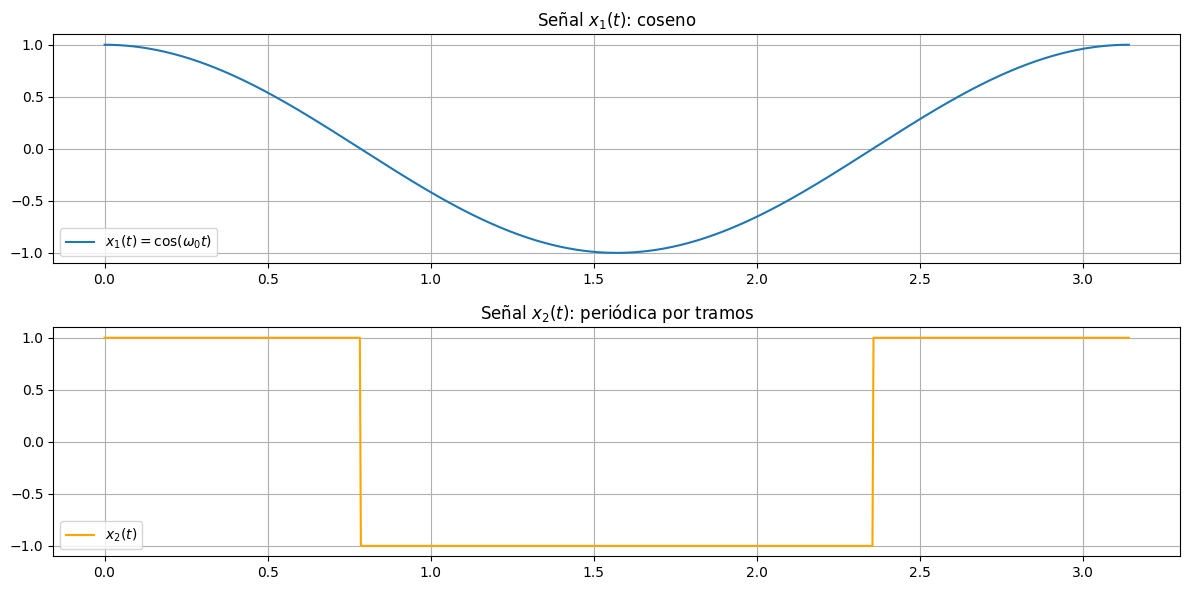

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros base
omega_0 = 2
T = 2 * np.pi / omega_0
N_muestras = 1000
tiempos = np.linspace(0, T, N_muestras)
senal_cos = np.cos(omega_0 * tiempos)

# Definición de señal por tramos
def tramo_periodica(ti_local, T):
    """Define una señal periódica por tramos sobre un periodo"""
    if 0 <= ti_local < T/4:
        return 1
    elif T/4 <= ti_local < 3*T/4:
        return -1
    elif 3*T/4 <= ti_local < T:
        return 1
    else:
        return 0

# Generar señal x₂(t)
senal_tramos = np.array([tramo_periodica(ti % T, T) for ti in tiempos])

# Gráficas
plt.figure(figsize=(12, 6))

# Señal coseno
plt.subplot(2, 1, 1)
plt.plot(tiempos, senal_cos, label=r'$x_1(t) = \cos(\omega_0 t)$')
plt.title("Señal $x_1(t)$: coseno")
plt.grid(True)
plt.legend()

# Señal por tramos
plt.subplot(2, 1, 2)
plt.plot(tiempos, senal_tramos, color='orange', label=r'$x_2(t)$')
plt.title("Señal $x_2(t)$: periódica por tramos")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


4. Sea $x′′(t)$ la segunda derivada de la señal $x(t)$, donde $t$ $∈$ $[ti, tf]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:
$$
c_{n}=\frac{1}{(ti-tf)n^{2}w_{o}^{2}}\int_{t_i}^{t_f}x^{''}(t)e^{-jnw_{o}t}dt;\quad n\in\mathbb{Z}
$$
¿Cómo se pueden calcular los coeficientes an y bn desde $x′′(t)$ en la serie trigonométrica de Fourier?.

Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción para $n∈{0,±1,±2,±3,±4,±5}$, a partir de $x′′(t)$ para la señal $x(t)$ en la Figura 1 . Compruebe el espectro obtenido con la estimación a partir de $x(t)$ y presente las respectivas simulaciones sobre Python.

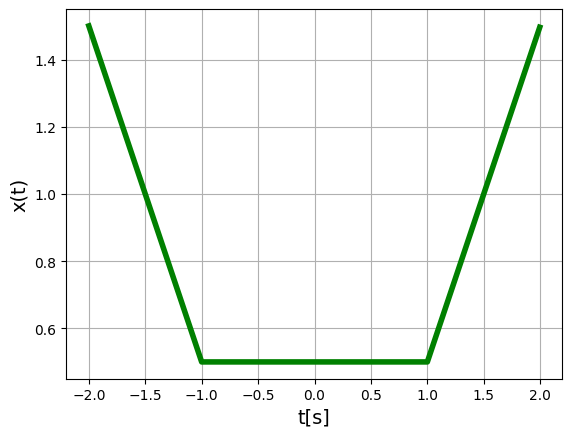

In [25]:
 from ipywidgets import interact, IntSlider
import numpy as np
import matplotlib.pyplot as plt

A = 1
lim_ext = 2
lim_int = 1

# Parámetros de la señal
T = 2 * lim_ext
f_base = 1 / T
f_muestreo = 1000 * f_base
tiempo = np.arange(-T/2, T/2, 1/f_muestreo)
num_muestras = len(tiempo)

def trapezoide(t, a, b, c, d):
    return np.maximum(0, np.minimum((t - a) / (b - a), np.minimum(1, (d - t) / (d - c))))

# Definir señal invertida + desplazamiento vertical
senal_original = -trapezoide(tiempo, -lim_ext, -lim_int, lim_int, lim_ext) + 1.5

# Graficar
plt.plot(tiempo, senal_original, 'g', linewidth=4)
plt.grid()
plt.xlabel("t[s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.show()


In [13]:
N_armonicos = 5
omega_base = 2 * np.pi / T

# Base de Fourier
base_fourier = np.zeros((num_muestras, 2 * N_armonicos + 1), np.complex128)
for k in range(-N_armonicos, N_armonicos + 1):
    base_fourier[:, k + N_armonicos] = np.exp(1j * k * omega_base * tiempo)

# Espectro (teórico)
espectro = np.zeros(2 * N_armonicos + 1, np.complex128)
indices_n = np.linspace(-N_armonicos, N_armonicos, 2 * N_armonicos + 1)
espectro = (2 * (np.cos(indices_n * np.pi) - np.cos(indices_n * np.pi * 0.5))) / (np.pi**2 * indices_n**2)
espectro[N_armonicos] = 3 / 4  # Nivel DC


<ipython-input-13-5f8cbd69de5e>:12: RuntimeWarning: invalid value encountered in divide
  espectro = (2 * (np.cos(indices_n * np.pi) - np.cos(indices_n * np.pi * 0.5))) / (np.pi**2 * indices_n**2)


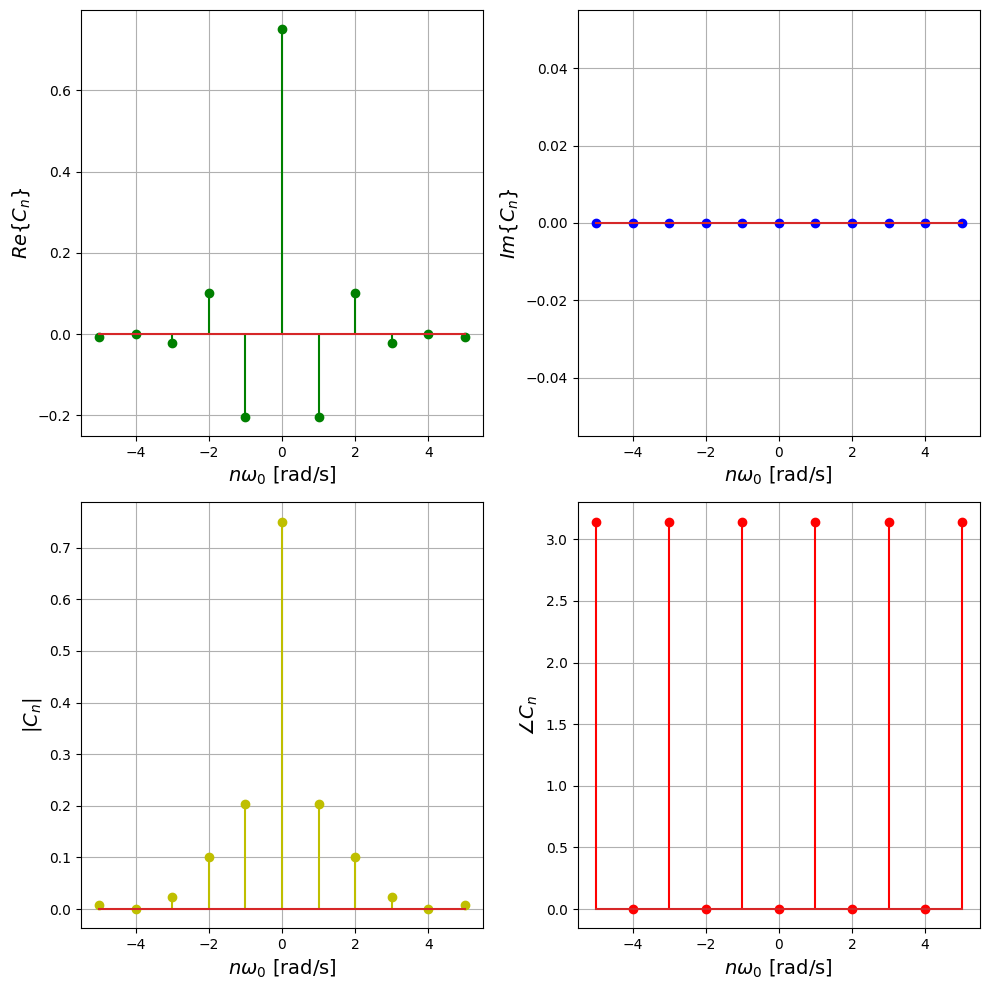

In [24]:
fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.stem(indices_n, np.real(espectro), 'g')
plt.xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.grid()
plt.axis('tight')

plt.subplot(2, 2, 2)
plt.stem(indices_n, np.imag(espectro), 'b')
plt.xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.grid()
plt.axis('tight')

plt.subplot(2, 2, 3)
plt.stem(indices_n, np.abs(espectro), 'y')
plt.xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.grid()
plt.axis('tight')

plt.subplot(2, 2, 4)
plt.stem(indices_n, np.angle(espectro), 'r')
plt.xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
plt.ylabel(r'$\angle C_n$', fontsize=14)
plt.grid()
plt.axis('tight')

fig.tight_layout()


In [22]:
P_total = 2 / 3  # Potencia total estimada

def reconstruir(N_partes=1):
    indices_activos = np.arange(N_armonicos - N_partes, N_armonicos + N_partes + 1)
    error_rel = 1 - np.sum(np.abs(espectro[indices_activos])**2) / P_total

    # Señal reconstruida
    señal_estimada = base_fourier[:, indices_activos].dot(espectro[indices_activos])

    # Graficar señal original vs estimada
    plt.plot(tiempo, señal_estimada, color='b', label='$x_e(t)$')
    plt.plot(tiempo, senal_original, color='g', label='x(t)')
    plt.title('$E_r$ = %.2f [%%]' % (100 * error_rel), fontsize=16)
    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return

interact(reconstruir, N_partes=(1, N_armonicos, 1))


interactive(children=(IntSlider(value=1, description='N_partes', max=5, min=1), Output()), _dom_classes=('widg…

<function __main__.reconstruir(N_partes=1)>